
# Oscilaciones 
#### por Rodolfo Ernesto Aviña Varela
El estado de oscilación es propio de los sistemas que tienen un punto de equilibrio de energía estable, pueden hallarse inicialmente o no en reposo, si se hallan en reposo las oscilaciones solo aparecen cuando el sistema es perturbado por una fuerza externa. Cuando el sistema se halla en estado de oscilación aparecen fuerzas que tienden a restaurar el sistema -fuerzas restauradoras- a su estado de reposo. 

En la naturaleza se tiene que lidiar con el rozamiento y por ende con la pérdida de energía que este conlleva, entonces los osciladores tienden a disipar la energía que les saco del equilibrio y regresar, si es que no se excedieron los límites de elasticidad del material, a la posición de reposo en el punto de equilibrio estable, los osciladores que presentan este comportamiento son llamados amortiguados. Nosotros podríamos querer que nuestro sistema mantenga el estado de oscilación entonces introducimos una fuerza que compense la pérdida de energía, a los sistemas que se les suministra este tipo de fuerza se les llama osciadores forzados, si además pierden energía entonces serán osciladores amortiguados forzados. 

### Problema 1. El péndulo forzado amortiguado

<img src="esquemap1.png">

En el esquema se define el problema como sigue: un masa atada en un extremo a una cuerda *ideal* fija en su otro extremo al *techo* es soltada. El ángulo esta definido desde la horizontal en sentido antihorario positivo. Este sistema experimental se halla sumergido en algún medio viscoso que genere una fuerza de resistencia en oposición a la velocidad, dicha fuerza generará un amortiguamiento de la oscilación. Pero aparecerá otra fuerza que propulsará (o impulsará) el péndulo aun cuando la fricción este presente.

La ecuación de movimiento del péndulo forzado amortiguado, para ángulos pequeños es: 

$$
\ddot{\theta} + 2 \beta \dot{\theta} + \omega_0^2 \sin(\theta) = A\cos(\omega t)
$$

$\theta$ es el ángulo que se desplaza el péndulo, $\beta^2 \equiv g/l$ es el parámetro de amortiguamiento donde $l$ es la longitud del brazo del péndulo y , $g$ es la aceleración debida a la gravedad. $\omega_0^2 = g/l$. $A=F_0/l$ y $\omega$ es la frecuencia ángular de la fuerza que propulsora que mantiene la oscilación, $F_0$.

Nota: en la tarea se expresa el coeficiente del termino $\dot{\theta}$ como $\mu$, no como $2\beta$, se hace el cambio para simplificar la forma de la solución de la EDO.

Como sabemos las EDO no homogéneas tienen como solución: $\theta(t)=\theta_h(t)+\theta_p(t)$, dónde h es por homogénea y p por particular.

$$
\spadesuit \hspace{1.5cm} \theta_h(t)=e^{-\beta t} \left[ A_1\exp \left( \sqrt{\beta^2-\omega_0^2} t \right) + A_2\exp \left( - \sqrt{\beta^2 -\omega_0^2} t \right) \right]
$$

$$
\spadesuit \hspace{1.5cm} \theta_p(t) = D\cos(\omega t - \delta)
$$

Dónde:

$$
D=\frac{A}{\sqrt{(\omega_0^2-\omega^2)^2 + 4\omega^2\beta^2}}
$$

y

$$
\tan(\delta)=\frac{2\omega\beta}{\omega_0^2-\omega^2}
$$

#### Limite lineal
Considerando ángulos pequeños tenemos la ecuación lineal forzada y amortiguada cuya solución particular tiene una cierta amplitud y fase dada en términos de los parametros de la ecuación de movimiento, usar $A=1$, $\omega_0=1$ y $\beta = 0.025$ (originalmente en la tarea se da $\mu=0.05$ pero ya que $\mu=2\beta$):
#### a)
Grafica la amplitud $D$, como función de la frecuencia de la fuerza externa. ¿Existe alguna resonancia?

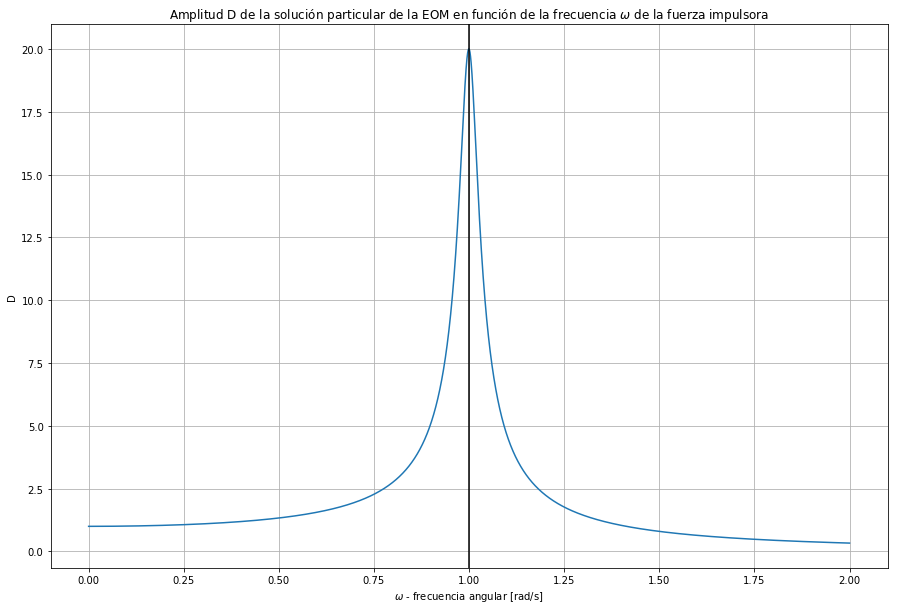

maximo cuando Omega es: 0.9994000000000001


In [26]:
#INITIALIZATION
import matplotlib.pyplot as plt #Para graficar
import math as m #fuciones matemáticas: seno, coseno, ln,...
from scipy.integrate import odeint #Para resolver ODEs
import numpy  as np #linear algebra

def D(Omega,Beta=0.025,Omega_cero=1.0,A=1.0):
    '''
    D, function that returns the amplitude of the particular solution of the driving and damped pendulum EOM
    Omega, independent variable, angular frequency of the driven function
    :::Parameters:::
    Beta       = 0.025  #damped parameter
    Omega_cero = 1.0    #natural angular frequency
    A          = 1.0    #natural amplitude
    '''    
    return A/(m.sqrt((Omega_cero**2-Omega**2)**2 + 4*Omega**2*Beta**2))

D_n=[]
Omega_n=[]
for O in range(0,20000):
    dO = 0.0001    
    D_n.append(D(O*dO))
    Omega_n.append(float(O)*dO)
    
plt.figure(figsize=(15,10))
plt.plot(Omega_n,D_n)
plt.title("Amplitud D de la solución particular de la EOM en función de la frecuencia $\omega$ de la fuerza impulsora")
plt.xlabel("$\omega$ - frecuencia angular [rad/s]")
plt.ylabel("D")
#plt.axhline(y=0, color='k')
plt.axvline(x=1, color='k')
plt.grid(True)
plt.show()    

#Element of Omega_n vector that has the same index as the maximum element of the D_n vector
print("maximo cuando Omega es: " + str(Omega_n[D_n.index(max(D_n))]))

Si existe resonancia en el valor $Omega \rightarrow 1.0$. En realidad no es exactamente 1 sino el valor mostrado arriba en la gráfica que es casi 1, esto se corresponde con el resultado obtenido de hallar la frecuencia de la función impulsora que da el máximo de la amplitud $D$. Como $\beta$ tiene un valor muy pequeño,  es prácticamente 0 al elevar al cuadrado.

$$
\omega_R=\sqrt{\omega_0^2 - 2\beta^2}
$$

La R es por resonancia, es decir, la omega de resonancia.
#### b)
Graficar la fase $\delta$ de la solución como función de la frecuencia de la fuerza externa.

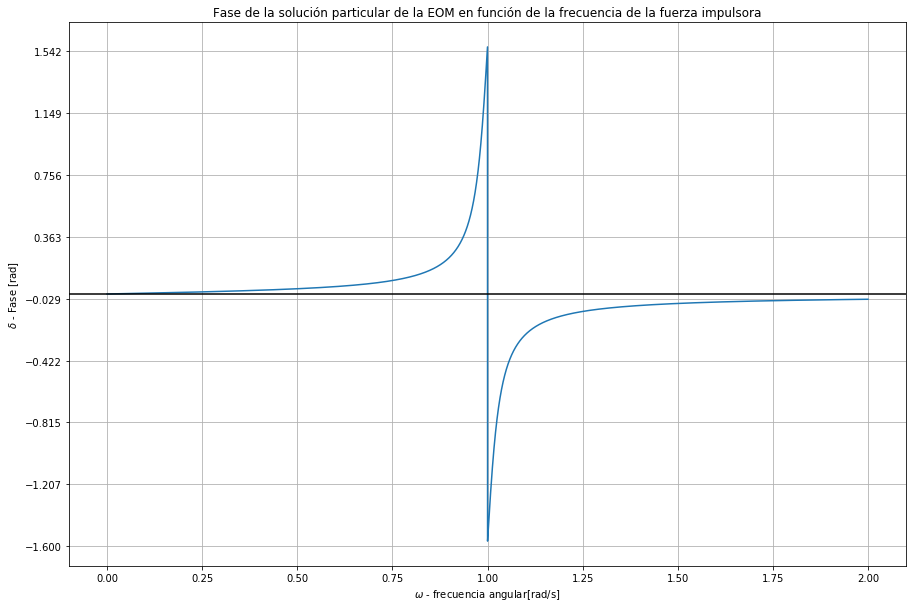

maximo cuando Omega es: 0.9999


In [28]:
def Delta(Omega,Beta=0.025,Omega_cero=1.0):
    '''
    D, function that returns the amplitude of the particular solution of the driving and damped pendulum EOM
    Omega, independent variable, angular frequency of the driven function
    :::Parameters:::
    Beta       = 0.025  #damped parameter
    Omega_cero = 1.0    #natural angular frequency
    '''    
    if (Omega_cero**2-Omega**2)==0:
        return 0
    return m.atan(2*Omega*Beta/(Omega_cero**2-Omega**2))

Delta_n=[]
Omega_n=[]
for O in range(0,20000):
    dO = 0.0001    
    Delta_n.append(Delta(O*dO))
    Omega_n.append(float(O)*dO)
    
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(Omega_n,Delta_n)
plt.title("Fase de la solución particular de la EOM en función de la frecuencia de la fuerza impulsora")
plt.xlabel("$\omega$ - frecuencia angular[rad/s]")
plt.ylabel("$\delta$ - Fase [rad]")
plt.axhline(y=0, color='k')
plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show()    

#Element of Omega_n vector that has the same index as the maximum element of the Delta_n vector
print("maximo cuando Omega es: " + str(Omega_n[Delta_n.index(max(Delta_n))]))

Se suprimió una indeterminación cuando $\omega \rightarrow \omega_0$, por ello el salto abrupto del máximo al mínimo, en la indeterminación se introdujo un cero.

#### c)
Graficar el ángulo y la velocidad angular como función del tiempo para 2 condiciones iniciales distintas. Usando la solución general tenemos que:

$$
\theta(t)=\theta_h(t)+\theta_p(t)
$$

La solución homogénea es:
$$
\theta_h(t) = e^{-\beta t} \left[ A_1 \exp \left( \sqrt{\beta^2-\omega_0^2} t \right) + A_2 \exp \left( -\sqrt{\beta^2-\omega_0^2}  t \right)\right]
$$

Si $\beta^2 < \omega_0^2$ podemos reescribir $\theta_h$ como:
$$
\theta_h(t) = A_0e^{-\beta t}\cos(\omega_1 t-\delta_0)
$$

Dónde $ \omega_1^2 = \omega_0^2 - \beta^2.$  La derivada de la solución homogénea cuando $\beta^2 < \omega_0^2$
$$
\dot\theta_h(t) = -A_0\omega_1e^{-\beta t}\sin(\omega_1 t-\delta_0) - \beta \theta_h(t)
$$

La solución particular es:
$$
\theta_p(t) = D\cos(\omega t - \delta)
$$

La derivada de la solución particular
$$
\dot\theta_p(t) = -\omega D\sin(\omega t - \delta)
$$

Dónde:

$$
D=\frac{A}{\sqrt{(\omega_0^2-\omega^2)^2 + 4\omega^2\beta^2}}
$$

y

$$
\tan(\delta)=\frac{2\omega\beta}{\omega_0^2-\omega^2}
$$

La derivada de la solución total
$$
\dot\theta(t)=\dot\theta_h(t)+\dot\theta_p(t)
$$

Se proponen el siguiente par de condiciones iniciales: 1) En $t=0$ la masa del péndulo es soltada cuando el ángulo (definido como en el diagrama) vale $\theta=\pi/18\:[rad]$ (es decir, 10 grados) con una velocidad inicial $\dot\theta(t=0)=0\:[rad/s]$; 2) En $t=0$, $\theta(t) = \pi/36\:[rad]$ (es decir 5 grados) con una velocidad inicial $\dot\theta(t=0)=0\:rad/s$. Además fijamos el valor $\omega=0.7$ para ambos casos. Introduciendo estas condiciones iniciales en la solución total de la EOM del péndulo forzado amortiguado obtenemos los siguientes coeficientes para la solución homogénea (solo hace falta definir estos, no los de la particular):

Sea $\theta_0$ el valor inicial del ángulo (en este caso $\pi/18$ o $\pi/36$):
$$
A_0 = \frac{\theta_0}{\cos \delta_0}
$$
$$
\delta_0=\arctan\left(\frac{\beta}{\omega_1}\right) \hspace{1.5cm}, \omega_1^2 = \omega_0^2 - \beta^2 
$$

Como podemos ver de la última ecuación el parámetro $\delta_0$ no depende de las condiciones iniciales dadas, solo $A_0$. Como $\beta$ es pequeño, cuando lo elevamos al cuadrado se hace más pequeño, entonces $\omega_1^2 = \omega_0^2-\beta^2 \simeq \omega_0^2$. Y como $\omega_0$ es unitaria entonces $\delta_0 \simeq \arctan(\beta)$ si expandimos en serie de Taylor $\arctan(\beta)$ como $\beta$ es muy pequeña solo es importante el primer término que es $\beta$ mismo, entonces queda que una buena aproximación es $\delta_0 \simeq \beta$.

$$
\arctan(\beta)=\beta-\frac{1}{3}\beta^3 + ... \hspace{0.5cm} \wedge \hspace{0.5cm} \beta \ll 1 \hspace{0.5cm} \Rightarrow \hspace{0.5cm} \delta_0 \simeq \beta
$$

Luego el coseno de un número muy pequeño como $\beta$ (prácticamente cero) es prácticamente 1, y tenemos que:

$$
\cos(\beta \mid \beta \ll 1)\simeq 1 \hspace{0.5cm} \Rightarrow \hspace{0.5cm} A_0=\frac{\theta_0}{\cos \delta_0} \simeq \theta_0
$$

Podemos reescribir para este particular la ecuación de $\theta_h$ como:

$$
\theta_h(t) = \theta_0e^{-\beta t}\cos(\omega_0 t-\beta)
$$

Y la ecuación de $\dot \theta_h$ como:
$$
\dot\theta_h(t) = -\omega_0\theta_0e^{-\beta t}\sin(\omega_0 t-\beta) - \beta \theta_h(t)
$$

En consecuencia con las condiciones iniciales y los parámetros dados tenemos que: $A_0 = \theta_0 = \pi/18, \pi/36$ manteniendo $\omega=0.7$.

grafica 1, A_0 = pi/18


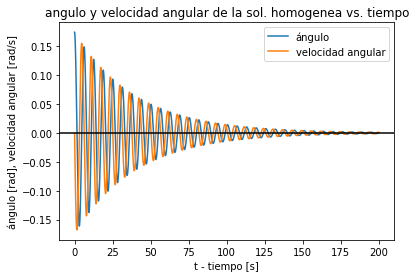

grafica 2, A_0 = pi/18


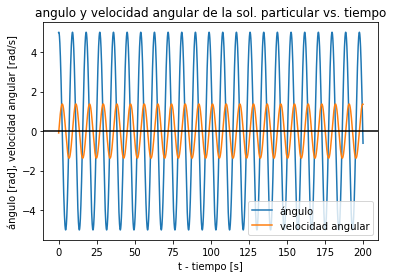

grafica 3, A_0 = pi/18


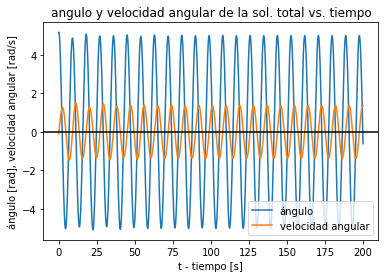

grafica 4, A_0 = pi/36


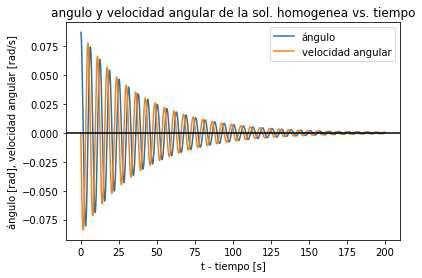

grafica 5, A_0 = pi/36


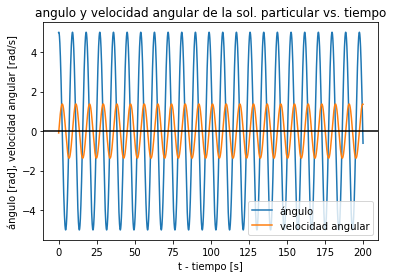

grafica 6, A_0 = pi/36


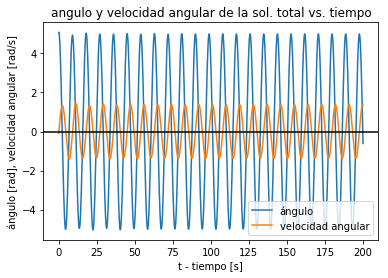

grafica 7, A_0 = pi/2


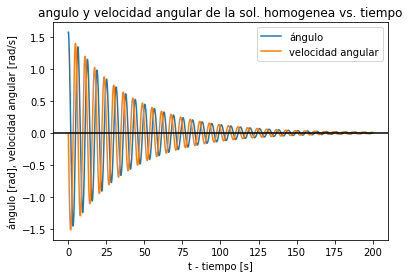

grafica 8, A_0 = pi/2


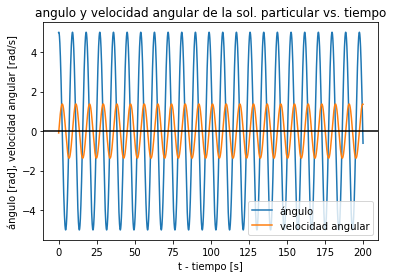

grafica 9, A_0 = pi/2


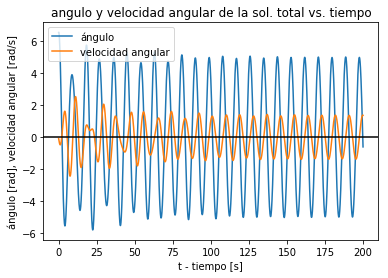

In [7]:
def theta_h(t,A_0,Delta_0=0.025,Beta=0.025,Omega_cero=1.0):
    '''
    theta angle function of time, homogeneous solution of EOM
    t time, independent variable
    :::Parameters:::
    A_0                 #amplitude, result of boundary conditions
    Delta               #phase, result of boundary conditions
    Beta                #damped parameter    
    Omega_cero          #natural angular frequency
    '''    
    return A_0*m.exp(-Beta*t)*m.cos(Omega_cero*t - Beta)

def dTheta_h(t,A_0,Delta_0=0.025,Beta=0.025,Omega_cero=1.0):
    '''
    dTheta angle derivative function of time
    t time, independent variable
    :::Parameters:::
    A_0                 #amplitude, result of boundary conditions
    Delta               #phase, result of boundary conditions
    Beta                #damped parameter    
    Omega_cero          #natural angular frequency
    '''    
    theta_h_i=theta_h(t,A_0,Delta_0,Beta,Omega_cero)
    return -A_0*Omega_cero*m.exp(-Beta*t)*m.sin(Omega_cero*t - Beta) -Beta*theta_h_i
    
    
def theta_p(t,Omega=2.0,Beta=0.025,Omega_cero=1.0,A=1.0):
    '''
    theta angle function of time, particular solution of EOM
    t time, independent variable
    :::Parameters:::
    Omega               #frequency of driven function
    Beta                #damped parameter
    Omega_cero          #natural angular frequency
    A                   #Amplitude
    ''' 
    D_i = D(Omega,Beta,Omega_cero,A)
    D_i = 5.0
    Delta_i = Delta(Omega,Beta,Omega_cero)
    return D_i*m.cos(Omega*t - Delta_i)


def dTheta_p(t,Omega=2.0,Beta=0.025,Omega_cero=1.0,A=1.0):
    '''
    anglular velocity function of time
    t time, independent variable
    :::Parameters:::
    Omega               #frequency of driven function
    Beta                #damped parameter
    Omega_cero          #natural angular frequency
    A                   #Amplitude
    ''' 
    D_i = D(Omega,Beta,Omega_cero,A)
    Delta_i = Delta(Omega,Beta,Omega_cero)
    return Omega*D_i*m.sin(Omega*t - Delta_i)

'''A_0 = pi/18'''

theta_n  = [] #Stores the sum of the particular and the homogeneous solutions
dTheta_n = [] #Stores the sum of the derivatives of the particular and the homogeneous solutions
t_n      = [] #Stores the time for each data in the arrays above

A_0      = (m.pi/18.0) #case 1
Delta_0  = 0.025   #fixed
Beta     = 0.025   #fixed
Omega    = 0.7     #fixed
Omega_cero = 1.0   #fixed
A        = 1.0     #fixed

theta_hn  = [] #Stores the homogeneous solution data
dTheta_hn = [] #Stores the homogeneous solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_hn.append(theta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    dTheta_hn.append(dTheta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    t_n.append(t*dt)
    
theta_pn  = [] #Stores the particular solution data
dTheta_pn = [] #Stores the particular solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_pn.append(theta_p(t*dt,Omega,Beta,Omega_cero,A))
    dTheta_pn.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A))
    #t_n.append(t*dt)

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_n.append(theta_p(t*dt,Omega,Beta,Omega_cero,A) + theta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    dTheta_n.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A) + dTheta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    #t_n.append(t*dt)


    
print("grafica 1, A_0 = pi/18")
plt.plot(t_n,theta_hn,label="ángulo")
plt.plot(t_n,dTheta_hn, label="velocidad angular")
plt.title("angulo y velocidad angular de la sol. homogenea vs. tiempo")
plt.ylabel("ángulo [rad], velocidad angular [rad/s]")
plt.xlabel("t - tiempo [s]")
plt.axhline(y=0, color='k')
plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show()    

print("grafica 2, A_0 = pi/18")
plt.plot(t_n,theta_pn,label="ángulo")
plt.plot(t_n,dTheta_pn, label="velocidad angular")
plt.title("angulo y velocidad angular de la sol. particular vs. tiempo")
plt.ylabel("ángulo [rad], velocidad angular [rad/s]")
plt.xlabel("t - tiempo [s]")
plt.axhline(y=0, color='k')
plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show()   

print("grafica 3, A_0 = pi/18")
plt.plot(t_n,theta_n,label="ángulo")
plt.plot(t_n,dTheta_n, label="velocidad angular")
plt.title("angulo y velocidad angular de la sol. total vs. tiempo")
plt.ylabel("ángulo [rad], velocidad angular [rad/s]")
plt.xlabel("t - tiempo [s]")
plt.axhline(y=0, color='k')
plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show()       

'''A_0 = pi/36'''

theta_n  = [] #Stores the sum of the particular and the homogeneous solutions
dTheta_n = [] #Stores the sum of the derivatives of the particular and the homogeneous solutions
t_n      = [] #Stores the time for each data in the arrays above

A_0      = (m.pi/36.0) #case 1
Delta_0  = 0.025   #fixed
Beta     = 0.025   #fixed
Omega    = 0.7     #fixed
Omega_cero = 1.0   #fixed
A        = 1.0     #fixed

theta_hn  = [] #Stores the homogeneous solution data
dTheta_hn = [] #Stores the homogeneous solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_hn.append(theta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    dTheta_hn.append(dTheta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    t_n.append(t*dt)
    
theta_pn  = [] #Stores the particular solution data
dTheta_pn = [] #Stores the particular solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_pn.append(theta_p(t*dt,Omega,Beta,Omega_cero,A))
    dTheta_pn.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A))
    #t_n.append(t*dt)

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_n.append(theta_p(t*dt,Omega,Beta,Omega_cero,A) + theta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    dTheta_n.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A) + dTheta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    #t_n.append(t*dt)


print("grafica 4, A_0 = pi/36")    
plt.plot(t_n,theta_hn,label="ángulo")
plt.plot(t_n,dTheta_hn, label="velocidad angular")
plt.title("angulo y velocidad angular de la sol. homogenea vs. tiempo")
plt.ylabel("ángulo [rad], velocidad angular [rad/s]")
plt.xlabel("t - tiempo [s]")
plt.axhline(y=0, color='k')
plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show()    

print("grafica 5, A_0 = pi/36")    
plt.plot(t_n,theta_pn,label="ángulo")
plt.plot(t_n,dTheta_pn, label="velocidad angular")
plt.title("angulo y velocidad angular de la sol. particular vs. tiempo")
plt.ylabel("ángulo [rad], velocidad angular [rad/s]")
plt.xlabel("t - tiempo [s]")
plt.axhline(y=0, color='k')
plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show()   

print("grafica 6, A_0 = pi/36")    
plt.plot(t_n,theta_n,label="ángulo")
plt.plot(t_n,dTheta_n, label="velocidad angular")
plt.title("angulo y velocidad angular de la sol. total vs. tiempo")
plt.ylabel("ángulo [rad], velocidad angular [rad/s]")
plt.xlabel("t - tiempo [s]")
plt.axhline(y=0, color='k')
plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show()  

'''Bonus A_0 = pi/2'''

theta_n  = [] #Stores the sum of the particular and the homogeneous solutions
dTheta_n = [] #Stores the sum of the derivatives of the particular and the homogeneous solutions
t_n      = [] #Stores the time for each data in the arrays above

A_0      = (m.pi/2.0) #case 1
Delta_0  = 0.025   #fixed
Beta     = 0.025   #fixed
Omega    = 0.7     #fixed
Omega_cero = 1.0   #fixed
A        = 1.0     #fixed

theta_hn  = [] #Stores the homogeneous solution data
dTheta_hn = [] #Stores the homogeneous solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_hn.append(theta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    dTheta_hn.append(dTheta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    t_n.append(t*dt)
    
theta_pn  = [] #Stores the particular solution data
dTheta_pn = [] #Stores the particular solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_pn.append(theta_p(t*dt,Omega,Beta,Omega_cero,A))
    dTheta_pn.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A))
    #t_n.append(t*dt)

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_n.append(theta_p(t*dt,Omega,Beta,Omega_cero,A) + theta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    dTheta_n.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A) + dTheta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    #t_n.append(t*dt)


print("grafica 7, A_0 = pi/2")        
plt.plot(t_n,theta_hn,label="ángulo")
plt.plot(t_n,dTheta_hn, label="velocidad angular")
plt.title("angulo y velocidad angular de la sol. homogenea vs. tiempo")
plt.ylabel("ángulo [rad], velocidad angular [rad/s]")
plt.xlabel("t - tiempo [s]")
plt.axhline(y=0, color='k')
plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show()    

print("grafica 8, A_0 = pi/2")        
plt.plot(t_n,theta_pn,label="ángulo")
plt.plot(t_n,dTheta_pn, label="velocidad angular")
plt.title("angulo y velocidad angular de la sol. particular vs. tiempo")
plt.ylabel("ángulo [rad], velocidad angular [rad/s]")
plt.xlabel("t - tiempo [s]")
plt.axhline(y=0, color='k')
plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show()   

print("grafica 9, A_0 = pi/2")        
plt.plot(t_n,theta_n,label="ángulo")
plt.plot(t_n,dTheta_n, label="velocidad angular")
plt.title("angulo y velocidad angular de la sol. total vs. tiempo")
plt.ylabel("ángulo [rad], velocidad angular [rad/s]")
plt.xlabel("t - tiempo [s]")
plt.axhline(y=0, color='k')
plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show()    

Se decidió imprimir por separado las gráficas de la solución particular y de la solución homogénea porque en los casos que tomamos con $A_0= \pi/18$ y $\pi/36$ la amplitud de la solución homogénea es pequeña a comparación de la amplitud de la solución particular, lo cual hace que en la suma casi no se aprecie el efecto del amortiguamiento debido a la solución homogénea, solo la contribución de la fuerza impulsora que es mucho mayor. Las gráficas 1, 2 y 3 corresponden al caso $A_0 = \pi/18$, como puede verse al comparar con las gráficas del caso $\pi/36$ la amplitud es mayor en el primer caso. En ambos casos como los parámetros no cambian la gráfica de la solución particular permanece igual, estos dos casos fueron tomados para ángulos pequeños porque es una condición impuesta en el planteamiento matemático del problema, es decir que un caso como $\pi/2$ no es posible físicamente aunque si matemáticamente, dicho caso es el correspondiente a las gráficas 7, 8 y 9 en este como la amplitud de la solución homogénea es mayor ya se aprecia notoriamente su contribución en la solución total.

#### d)
Graficar en el espacio fase las 2 trayectorias con condiciones iniciales distintas del inciso anterior.

El caso 1 es el correspondiente a $\pi/18$ y el caso 2 a $\pi/36$

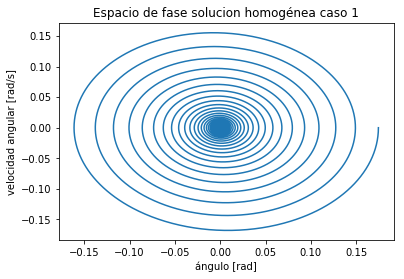

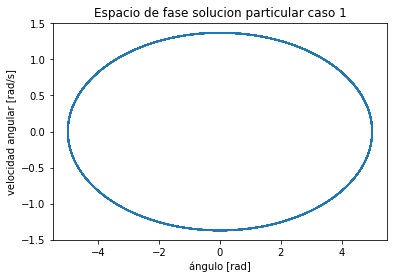

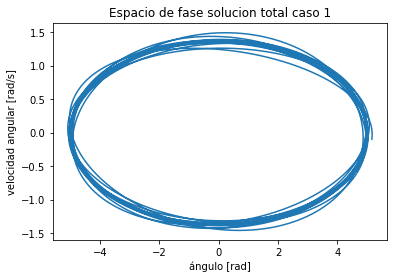

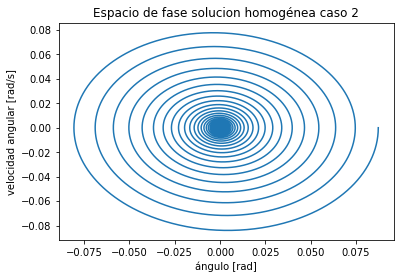

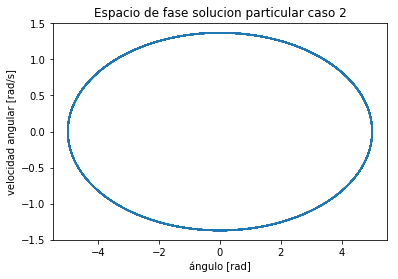

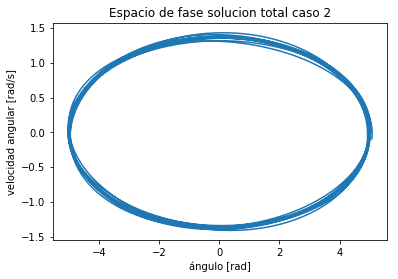

In [11]:
'''
Caso 1
'''

theta_n  = [] #Stores the sum of the particular and the homogeneous solutions
dTheta_n = [] #Stores the sum of the derivatives of the particular and the homogeneous solutions
t_n      = [] #Stores the time for each data in the arrays above

A_0      = (m.pi/18.0) #case 1
Delta_0  = 0.025   #fixed
Beta     = 0.025   #fixed
Omega    = 0.7     #fixed
Omega_cero = 1.0   #fixed
A        = 1.0     #fixed

theta_hn  = [] #Stores the homogeneous solution data
dTheta_hn = [] #Stores the homogeneous solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_hn.append(theta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    dTheta_hn.append(dTheta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    t_n.append(t*dt)
    
theta_pn  = [] #Stores the particular solution data
dTheta_pn = [] #Stores the particular solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_pn.append(theta_p(t*dt,Omega,Beta,Omega_cero,A))
    dTheta_pn.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A))
    #t_n.append(t*dt)

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_n.append(theta_p(t*dt,Omega,Beta,Omega_cero,A) + theta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    dTheta_n.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A) + dTheta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    #t_n.append(t*dt)


plt.plot(theta_hn,dTheta_hn)
plt.title("Espacio de fase solucion homogénea caso 1")
plt.ylabel("velocidad angular [rad/s]")
plt.xlabel("ángulo [rad]")
#plt.axhline(y=0, color='k')
#plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show() 

plt.plot(theta_pn,dTheta_pn)
plt.title("Espacio de fase solucion particular caso 1")
plt.ylabel("velocidad angular [rad/s]")
plt.xlabel("ángulo [rad]")
#plt.axhline(y=0, color='k')
#plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show() 

plt.plot(theta_n,dTheta_n)
plt.title("Espacio de fase solucion total caso 1")
plt.ylabel("velocidad angular [rad/s]")
plt.xlabel("ángulo [rad]")
#plt.axhline(y=0, color='k')
#plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show() 

'''
Caso 2
'''

theta_n  = [] #Stores the sum of the particular and the homogeneous solutions
dTheta_n = [] #Stores the sum of the derivatives of the particular and the homogeneous solutions
t_n      = [] #Stores the time for each data in the arrays above

A_0      = (m.pi/36.0) #case 1
Delta_0  = 0.025   #fixed
Beta     = 0.025   #fixed
Omega    = 0.7     #fixed
Omega_cero = 1.0   #fixed
A        = 1.0     #fixed

theta_hn  = [] #Stores the homogeneous solution data
dTheta_hn = [] #Stores the homogeneous solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_hn.append(theta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    dTheta_hn.append(dTheta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    t_n.append(t*dt)
    
theta_pn  = [] #Stores the particular solution data
dTheta_pn = [] #Stores the particular solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_pn.append(theta_p(t*dt,Omega,Beta,Omega_cero,A))
    dTheta_pn.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A))
    #t_n.append(t*dt)

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_n.append(theta_p(t*dt,Omega,Beta,Omega_cero,A) + theta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    dTheta_n.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A) + dTheta_h(t*dt,A_0,Delta_0,Beta,Omega_cero))
    #t_n.append(t*dt)

plt.plot(theta_hn,dTheta_hn)
plt.title("Espacio de fase solucion homogénea caso 2")
plt.ylabel("velocidad angular [rad/s]")
plt.xlabel("ángulo [rad]")
#plt.axhline(y=0, color='k')
#plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show() 

plt.plot(theta_pn,dTheta_pn)
plt.title("Espacio de fase solucion particular caso 2")
plt.ylabel("velocidad angular [rad/s]")
plt.xlabel("ángulo [rad]")
#plt.axhline(y=0, color='k')
#plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show() 

plt.plot(theta_n,dTheta_n)
plt.title("Espacio de fase solucion total caso 2")
plt.ylabel("velocidad angular [rad/s]")
plt.xlabel("ángulo [rad]")
#plt.axhline(y=0, color='k')
#plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show() 

#### e)
Graficar en el espacio fase 2 trayectorias con dos amplitudes $A$ distintas , con $\mu=0$ y la misma condición inicial. Como $\mu=0$ entonces $\beta=0$. 

Como A es la amplitud asociada a la solución particular se asume que solo se desea el espacio fase de ésta y no el de la solución homogénea ni de la total.

Se usarán las amplitudes $A= 2$ y $A=3.56$

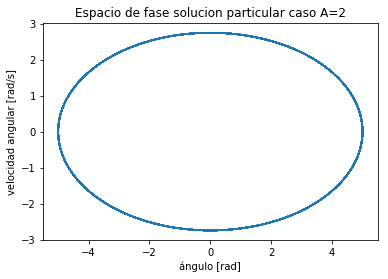

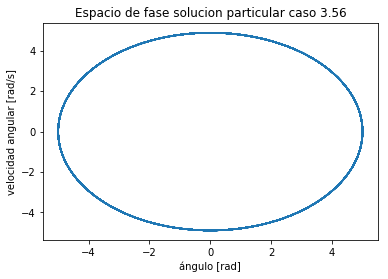

In [14]:
'''A=2.0'''
Beta     = 0.0   #fixed
Omega    = 0.7     #fixed
Omega_cero = 1.0   #fixed
A        = 2.0     #fixed
    
theta_pn  = [] #Stores the particular solution data
dTheta_pn = [] #Stores the particular solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_pn.append(theta_p(t*dt,Omega,Beta,Omega_cero,A))
    dTheta_pn.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A))
    #t_n.append(t*dt)

plt.plot(theta_pn,dTheta_pn)
plt.title("Espacio de fase solucion particular caso A=2")
plt.ylabel("velocidad angular [rad/s]")
plt.xlabel("ángulo [rad]")
#plt.axhline(y=0, color='k')
#plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show() 

'''A=3.56'''

Beta     = 0.0   #fixed
Omega    = 0.7     #fixed
Omega_cero = 1.0   #fixed
A        = 3.56     #fixed
    
theta_pn  = [] #Stores the particular solution data
dTheta_pn = [] #Stores the particular solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_pn.append(theta_p(t*dt,Omega,Beta,Omega_cero,A))
    dTheta_pn.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A))
    #t_n.append(t*dt)

plt.plot(theta_pn,dTheta_pn)
plt.title("Espacio de fase solucion particular caso 3.56")
plt.ylabel("velocidad angular [rad/s]")
plt.xlabel("ángulo [rad]")
#plt.axhline(y=0, color='k')
#plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show() 

#### f)
Graficar en el espacio fase 2 trayectorias con $\mu = 0 ,\: 2.0,\: 0.1$ ($\beta = \mu/2 = 0, 1.0, 0.05$)para la misma amplitud $A=1$ y la misma condición inicial.

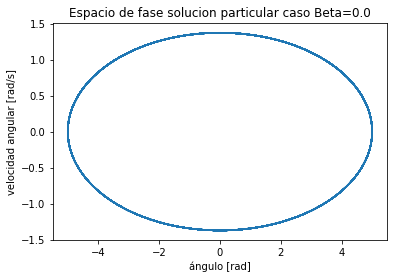

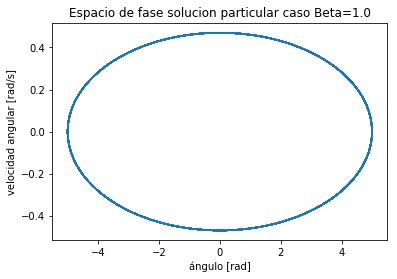

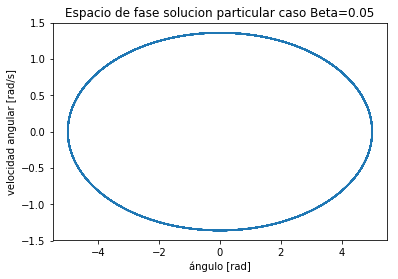

In [15]:
'''beta=0.0'''
Beta     = 0.0   #fixed
Omega    = 0.7     #fixed
Omega_cero = 1.0   #fixed
A        = 1.0     #fixed
    
theta_pn  = [] #Stores the particular solution data
dTheta_pn = [] #Stores the particular solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_pn.append(theta_p(t*dt,Omega,Beta,Omega_cero,A))
    dTheta_pn.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A))
    #t_n.append(t*dt)

plt.plot(theta_pn,dTheta_pn)
plt.title("Espacio de fase solucion particular caso Beta=0.0")
plt.ylabel("velocidad angular [rad/s]")
plt.xlabel("ángulo [rad]")
#plt.axhline(y=0, color='k')
#plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show() 

'''beta=1.0'''
Beta     = 1.0   #fixed
Omega    = 0.7     #fixed
Omega_cero = 1.0   #fixed
A        = 1.0     #fixed
    
theta_pn  = [] #Stores the particular solution data
dTheta_pn = [] #Stores the particular solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_pn.append(theta_p(t*dt,Omega,Beta,Omega_cero,A))
    dTheta_pn.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A))
    #t_n.append(t*dt)

plt.plot(theta_pn,dTheta_pn)
plt.title("Espacio de fase solucion particular caso Beta=1.0")
plt.ylabel("velocidad angular [rad/s]")
plt.xlabel("ángulo [rad]")
#plt.axhline(y=0, color='k')
#plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show() 

'''beta=0.05'''
Beta     = 0.05   #fixed
Omega    = 0.7     #fixed
Omega_cero = 1.0   #fixed
A        = 1.0     #fixed
    
theta_pn  = [] #Stores the particular solution data
dTheta_pn = [] #Stores the particular solution derivative data
#t_n      = []  #Stores the time for each data in the arrays above

#this cycle will give time values to eval the functions defined above and stores the data on the arrays
for t in range(0,20000): 
    dt = 0.01    
    theta_pn.append(theta_p(t*dt,Omega,Beta,Omega_cero,A))
    dTheta_pn.append(dTheta_p(t*dt,Omega,Beta,Omega_cero,A))
    #t_n.append(t*dt)

plt.plot(theta_pn,dTheta_pn)
plt.title("Espacio de fase solucion particular caso Beta=0.05")
plt.ylabel("velocidad angular [rad/s]")
plt.xlabel("ángulo [rad]")
#plt.axhline(y=0, color='k')
#plt.legend()
#plt.yticks(np.arange(-1.6, 1.6, step=m.pi/8))
plt.show() 

### Problema 2. Ecuación no lineal no forzada sin amortiguamiento
Usar el modulo **odeint** de la libreria scipy (from.scipy.integrate import odeint) para encontrar soluciones numéricas en los siguientes problemas:
#### a)
Para un ángulo inicial de 70 grados, en reposo y una frecuencia natural unitaria, realiza una gráfica dónde compares la solución numérica del ángulo y su velocidad con aquella de la ecuación lineal usando las mismas condiciones inciales.

La ecuación del oscilador amortiguado forzado puede escribirse como:
$$
\ddot{x}+f(\dot{x})+g(x)=h(t)
$$

$\ddot{x}$ es el término de 2do orden que aparece porque el sistema que oscila cambio su estado de movimiento, $f(\dot{x})$ es el término asociado con el amortiguamiento, depende de que haya una velocidad, es decir aparece en oposición al movimiento, $g(x)$ es la fuerza restauradora, es simplemente una fuerza que aparece en ciertos sistemas (los que tienen un punto de equilibrio estable) y se dirige siempre hacia el punto de equilibrio, si ya sea $f(\dot{x})$ o $g(x)$ tienen valores no lineales de $x$ o alguna de sus derivadas se dice que el sistema es no lineal. Finalmente el termino $h(t)$ es el asociado a una fuerza que es externa pero suministrada al sistema que oscila . Para que un sistema entre en estado de oscilación se requieren solo 2 terminos de esa ecuación, el termino $\ddot{x}$ y el termino $g(x)$. Por el problema a resolver este será el caso, el más simple primero descrito por la ecuación que se pone a continuación:

$$
\ddot{x} + g(x) = 0
$$

Luego como suponemos que el sistema es no lineal entonces $g(x)$ debe tener alguna forma que en función de x sea no lineal, algunos ejemplos serían: $g(x)=x^2$, $g(x)=\cos(x)$, $g(x)=W^x$; pero también debera cumplir que se oponga a la dirección de movimiento, o dicho de otra forma, que se dirija siempre al punto de equilibrio, en el caso del resorte esto es muy directo, $F=-kx$, entonces para cualquier valor de $x$ $F$ siempre apunta en la dirección opuesta, esto solo ocurre cuando elegimos funciones impares porque en funciones impares $-s(z)=s(-z)$, no es el caso de las funciones pares como el coseno. Entonces ya está, $g(x)$ debe ser una función impar, con un signo "-" asociado al movimiento y no lineal.

Para el caso del péndulo simple (cuyo movil tiene un movimiento limitado a un plano) la ecuación de movimiento es:

$$
\ddot{\theta} + \omega_0^2\sin(\theta) = 0 \hspace{0.5cm} dónde\:\:\: \omega_0^2 = g/l
$$

cuando se trata de ángulos pequeños se puede hacer la aproximación $\sin(\theta) \simeq \theta$, pero para ángulos grandes esto no es válido. Para poder resolver la ecuación anterior primero debemos convertirla en 2 ecuaciones de primer orden, esto lo logramos muy fácil introduciendo la velocidad angular. Entonces podemos excribir:

$$
\omega(t) = \dot{\theta}(t)
$$

y la reescribimos la ecuación anterior para $\ddot{\theta}$ como:

$$
\dot{\omega}(t) = -\omega_0^2\sin(\theta)
$$

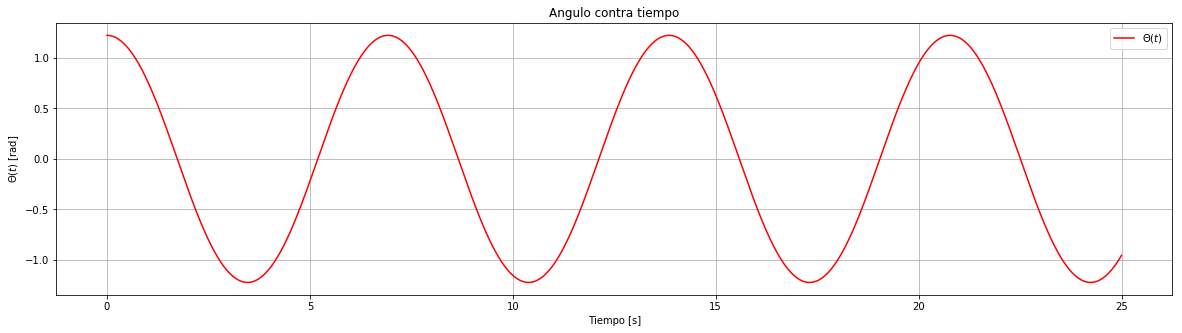

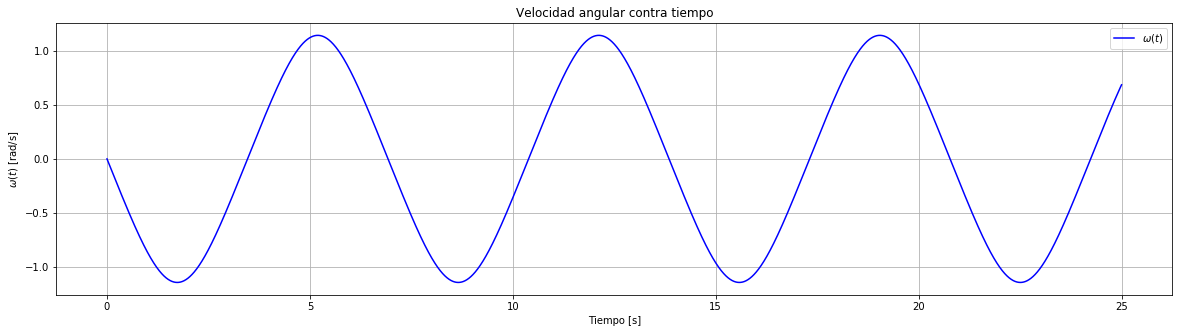

In [33]:
def funcion(g, t, ome_0,):
  (theta, omega) = y
  dgdt = (omega, -pow(ome_0,2)*np.sin(theta))
  return dgdt

y0 = (np.pi*7.0/18.0,0.0)


#Gráfica de la solución numérica para el ángulo y la velocidad angular
a = 0  #no se ocupa realmente, es solo para tener dos argumentos en args de odeint
ome_0 = 1.0
t = np.linspace(0, 25, 10000)
theta = odeint(funcion, g0, t, args=(ome_0,))

plt.figure(figsize=(17,5))
plt.plot(t, sol[:, 0], 'r', label='$\Theta(t)$')
plt.legend(loc='best')
plt.title("Angulo contra tiempo")
plt.ylabel('$\Theta(t)$ [rad]')
plt.xlabel('Tiempo [s]')
plt.grid()
plt.show()

plt.figure(figsize=(17,5))
plt.plot(t, sol[:, 1], 'b', label='$\omega(t)$')
plt.legend(loc='best')
plt.title('Velocidad angular contra tiempo')
plt.ylabel('$\omega(t)$ [rad/s]')
plt.xlabel('Tiempo [s]')
plt.grid()
plt.show()

#### b) 
Construye el espacio fase para una frecuencia natural unitaria, usando trayectorias que partan del reposo con un ángulo inicial que vaya  de -90 a 90 grados, en intervalos de 10 grados. Suma dos trayectorias que den vueltas, una en sentido contrario a las manecillas del reloj y otra en sentido de las mismas.

### Problema 3. Ecuación no lineal amortiguada no forzada

#### a) 
Utiliza un parámetro de amortiguamiento de 0.02, la frecuencia natural unitaria y observa cómo el espacio fase se distorciona. Compara cada trayectoria del inciso b) del ejercicio anterior con este caso amortiguado.

### Problema 4. Ecuación no lineal completa

#### a)
 Usando $\mu = 3\pi / 2, \: \omega_d = 2\pi,\: \omega_0= 3\pi$, grafica la solución para cinco casos  de A alrededor de 1.05. ¿Qué pasa con las soluciones?¿Qué ocurre si $A=2$?

#### b) 
Obten las trayectorias en el espacio de fase de los casos del inciso anterior.

#### Bonus track
Ve si puedes obtener un diagrama de bifurcación para esta ecuación no lineal. Busca información en la red para ver cómo hacerlo.
